In [1020]:
###########################################################################################################
# Teste Especialista de dados Banco RCI -------------------------------------------------------------------
# Autora: Suellen Teixeira Zavadzki de Pauli --------------------------------------------------------------
# Data: 17/08/21 ------------------------------------------------------------------------------------------
###########################################################################################################

####################################     Informações Gerais     ###########################################
# Empresa:Banco LEGOS -------------------------------------------------------------------------------------
# Tipo de modelo: Credit Score ----------------------------------------------------------------------------
# Objetivo: Desenvolver um modelo a fim de prever os proponentes com maior propensão de atingir mais de 30 
# dias de atraso após três meses da contratação ------------------------------------------------------------
# Variável resposta: Target.-------------------------------------------------------------------------------
###########################################################################################################

In [1021]:
#Bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# Importação da base de dados
Base= pd.read_csv("Base.csv")
Base.head()

,ANOMES_PRPOSTA,COD_PROPOSTA,idade,CEP,UF_AQUISICAO,carencia,Tipo_Pessoa,PERCENTUAL_ENTRADA_VEICU,ANO_MODELO_VEIC,Idade_Bem,...,Autonomos,Profissao,Status_prop,score_sis,var_1,var_2,var_3,var_4,var_5,target
0,202101,1,62,25,RJ,30,F,0.00,2018,>= 3 anos,...,N,Taxistas,EF,664,NaN,NaN,NaN,NaN,S,0.0
1,202101,2,75,68,AP,30,F,62.57,2021,0 Km,...,N,NaN,EF,673,3.0,A1,RUIM,A1,S,0.0
2,202101,3,56,22,RJ,30,F,53.00,2021,0 Km,...,N,NaN,EF,760,3.0,A4,RUIM,A1,S,0.0
3,202101,4,46,21,RJ,30,F,63.45,2021,0 Km,...,N,NaN,EF,715,3.0,A2,BOM,A1,S,0.0
4,202101,5,36,11,SP,30,F,0.00,2014,>= 3 anos,...,N,NaN,EF,671,NaN,NaN,NaN,NaN,S,0.0


In [1022]:
# Qtd. de Linhas e colunas
print(Base.shape)
# Tipo das variáveis
print(Base.info())

(9994, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ANOMES_PRPOSTA            9994 non-null   int64  
 1   COD_PROPOSTA              9994 non-null   int64  
 2   idade                     9994 non-null   int64  
 3   CEP                       9994 non-null   int64  
 4   UF_AQUISICAO              9993 non-null   object 
 5   carencia                  9994 non-null   int64  
 6   Tipo_Pessoa               9994 non-null   object 
 7   PERCENTUAL_ENTRADA_VEICU  9994 non-null   float64
 8   ANO_MODELO_VEIC           9994 non-null   int64  
 9   Idade_Bem                 9994 non-null   object 
 10  QTDE_PRESTACOES           9994 non-null   int64  
 11  VLR_PRINCIPAL             9994 non-null   float64
 12  TAXA_MENSAL               9994 non-null   float64
 13  VLR_RENDA                 9994 non-null   float64
 1

In [1023]:
# Níveis da variável UF_AQUISICAO
Base['UF_AQUISICAO'].unique()

array(['RJ', 'AP', 'SP', 'PE', 'DF', 'PA', 'BA', 'SC', 'MT', 'PI', 'MG',
       'PR', 'MA', 'CE', 'RS', 'RN', 'PB', 'ES', 'MS', 'GO', 'SE', 'AM',
       'TO', 'RO', 'AL', 'RR', 'AC', nan], dtype=object)

In [1024]:
# Cria a variável região por meio da variável UF_AQUISICAO
Base['UF_AQUISICAO'].unique()
Base['UF_AQUISICAO2']=Base['UF_AQUISICAO']
Base['UF_AQUISICAO']=np.where(Base['UF_AQUISICAO'] =='GO', 'Centro-Oeste', Base['UF_AQUISICAO'])
Base['UF_AQUISICAO']=np.where(Base['UF_AQUISICAO'] =='MT', 'Centro-Oeste', Base['UF_AQUISICAO'])
Base['UF_AQUISICAO']=np.where(Base['UF_AQUISICAO'] =='MS', 'Centro-Oeste', Base['UF_AQUISICAO'])
Base['UF_AQUISICAO']=np.where(Base['UF_AQUISICAO'] =='DF', 'Centro-Oeste', Base['UF_AQUISICAO'])

Base['UF_AQUISICAO']=np.where(Base['UF_AQUISICAO'] =='AL', 'Nordeste', Base['UF_AQUISICAO'])
Base['UF_AQUISICAO']=np.where(Base['UF_AQUISICAO'] =='BA', 'Nordeste', Base['UF_AQUISICAO'])
Base['UF_AQUISICAO']=np.where(Base['UF_AQUISICAO'] =='CE', 'Nordeste', Base['UF_AQUISICAO'])
Base['UF_AQUISICAO']=np.where(Base['UF_AQUISICAO'] =='MA', 'Nordeste', Base['UF_AQUISICAO'])
Base['UF_AQUISICAO']=np.where(Base['UF_AQUISICAO'] =='PB', 'Nordeste', Base['UF_AQUISICAO'])
Base['UF_AQUISICAO']=np.where(Base['UF_AQUISICAO'] =='PE', 'Nordeste', Base['UF_AQUISICAO'])
Base['UF_AQUISICAO']=np.where(Base['UF_AQUISICAO'] =='PI', 'Nordeste', Base['UF_AQUISICAO'])
Base['UF_AQUISICAO']=np.where(Base['UF_AQUISICAO'] =='AL', 'Nordeste', Base['UF_AQUISICAO'])
Base['UF_AQUISICAO']=np.where(Base['UF_AQUISICAO'] =='RN', 'Nordeste', Base['UF_AQUISICAO'])
Base['UF_AQUISICAO']=np.where(Base['UF_AQUISICAO'] =='SE', 'Nordeste', Base['UF_AQUISICAO'])

Base['UF_AQUISICAO']=np.where(Base['UF_AQUISICAO'] =='AC', 'Norte', Base['UF_AQUISICAO'])
Base['UF_AQUISICAO']=np.where(Base['UF_AQUISICAO'] =='AP', 'Norte', Base['UF_AQUISICAO'])
Base['UF_AQUISICAO']=np.where(Base['UF_AQUISICAO'] =='AM', 'Norte', Base['UF_AQUISICAO'])
Base['UF_AQUISICAO']=np.where(Base['UF_AQUISICAO'] =='PA', 'Norte', Base['UF_AQUISICAO'])
Base['UF_AQUISICAO']=np.where(Base['UF_AQUISICAO'] =='RO', 'Norte', Base['UF_AQUISICAO'])
Base['UF_AQUISICAO']=np.where(Base['UF_AQUISICAO'] =='RR', 'Norte', Base['UF_AQUISICAO'])
Base['UF_AQUISICAO']=np.where(Base['UF_AQUISICAO'] =='TO', 'Norte', Base['UF_AQUISICAO'])

Base['UF_AQUISICAO']=np.where(Base['UF_AQUISICAO'] =='ES', 'Sudeste', Base['UF_AQUISICAO'])
Base['UF_AQUISICAO']=np.where(Base['UF_AQUISICAO'] =='MG', 'Sudeste', Base['UF_AQUISICAO'])
Base['UF_AQUISICAO']=np.where(Base['UF_AQUISICAO'] =='RJ', 'Sudeste', Base['UF_AQUISICAO'])
Base['UF_AQUISICAO']=np.where(Base['UF_AQUISICAO'] =='SP', 'Sudeste', Base['UF_AQUISICAO'])

Base['UF_AQUISICAO']=np.where(Base['UF_AQUISICAO'] =='PR', 'Sul', Base['UF_AQUISICAO'])
Base['UF_AQUISICAO']=np.where(Base['UF_AQUISICAO'] =='RS', 'Sul', Base['UF_AQUISICAO'])
Base['UF_AQUISICAO']=np.where(Base['UF_AQUISICAO'] =='SC', 'Sul', Base['UF_AQUISICAO'])

Base['VLR_RENDA2']=Base['VLR_RENDA']
Base=Base.assign(VLR_RENDA_CAT=pd.cut(Base['VLR_RENDA'].astype(int), 
                               bins=[0, 3690, 4838,6560, 999999999999999999999999999999999], 
                               labels=['<3690', '3690-4838', '4838-6560','>6560']))

Base=Base.assign(IDADE_CAT=pd.cut(Base['idade'], 
                               bins=[0, 39,49, 60, 999999999999999999999999999999999], 
                               labels=['<39', '39-49', '49-60','>60']))

Base

,ANOMES_PRPOSTA,COD_PROPOSTA,idade,CEP,UF_AQUISICAO,carencia,Tipo_Pessoa,PERCENTUAL_ENTRADA_VEICU,ANO_MODELO_VEIC,Idade_Bem,...,var_1,var_2,var_3,var_4,var_5,target,UF_AQUISICAO2,VLR_RENDA2,VLR_RENDA_CAT,IDADE_CAT
0,202101,1,62,25,Sudeste,30,F,0.00,2018,>= 3 anos,...,NaN,NaN,NaN,NaN,S,0.0,RJ,3690.00,<3690,>60
1,202101,2,75,68,Norte,30,F,62.57,2021,0 Km,...,3.0,A1,RUIM,A1,S,0.0,AP,16400.00,>6560,>60
2,202101,3,56,22,Sudeste,30,F,53.00,2021,0 Km,...,3.0,A4,RUIM,A1,S,0.0,RJ,9840.00,>6560,49-60
3,202101,4,46,21,Sudeste,30,F,63.45,2021,0 Km,...,3.0,A2,BOM,A1,S,0.0,RJ,4592.00,3690-4838,39-49
4,202101,5,36,11,Sudeste,30,F,0.00,2014,>= 3 anos,...,NaN,NaN,NaN,NaN,S,0.0,SP,5740.00,4838-6560,<39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,202104,9990,61,55,Nordeste,30,F,41.04,2021,0 Km,...,3.0,A2,BOM,A1,S,NaN,PE,7380.00,>6560,>60
9990,202104,9991,51,12,Sudeste,30,F,75.47,2022,0 Km,...,3.0,A1,BOM,A1,N,NaN,SP,2870.00,<3690,49-60
9991,202104,9992,59,72,Centro-Oeste,30,F,29.44,2022,0 Km,...,1.0,A2,RUIM,B3,S,NaN,DF,6003.49,4838-6560,49-60
9992,202104,9993,51,89,Sul,30,F,30.86,2012,>= 3 anos,...,NaN,NaN,NaN,NaN,S,NaN,SC,2870.00,<3690,49-60


In [1025]:
# Verifica os dados faltantes
Base.isnull().sum()

ANOMES_PRPOSTA                 0
COD_PROPOSTA                   0
idade                          0
CEP                            0
UF_AQUISICAO                   1
carencia                       0
Tipo_Pessoa                    0
PERCENTUAL_ENTRADA_VEICU       0
ANO_MODELO_VEIC                0
Idade_Bem                      0
QTDE_PRESTACOES                0
VLR_PRINCIPAL                  0
TAXA_MENSAL                    0
VLR_RENDA                      0
VLR_MAX_RENDA_PRESUM           0
PC_COMPR_RENDA_FAMILIAR        0
Autonomos                      0
Profissao                   9739
Status_prop                    0
score_sis                      0
var_1                       2257
var_2                       2257
var_3                       2257
var_4                       2257
var_5                       1669
target                       503
UF_AQUISICAO2                  1
VLR_RENDA2                     0
VLR_RENDA_CAT                  8
IDADE_CAT                      0
dtype: int

Text(0, 0.5, 'Proporção')

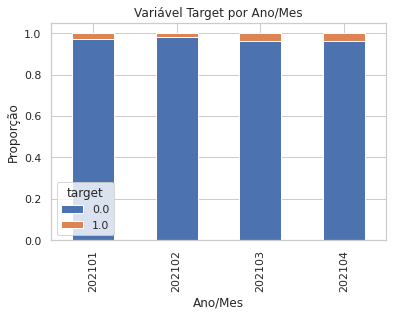

In [1026]:
#Análise bivariada - verifica sazonalidade/ problemas de base
table=pd.crosstab(Base.ANOMES_PRPOSTA,Base.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Variável Target por Ano/Mes')
plt.xlabel('Ano/Mes')
plt.ylabel('Proporção')

In [1027]:
# Exclui colunas e linhas que não fazem sentido estarem na análise
Base = Base.drop(['Profissao','Status_prop','Tipo_Pessoa','COD_PROPOSTA','ANOMES_PRPOSTA','UF_AQUISICAO2'], axis=1)
Base=Base[Base['target'].notna()]
Base=Base[Base['VLR_RENDA']<8000000]


Text(0, 0.5, 'Proporção')

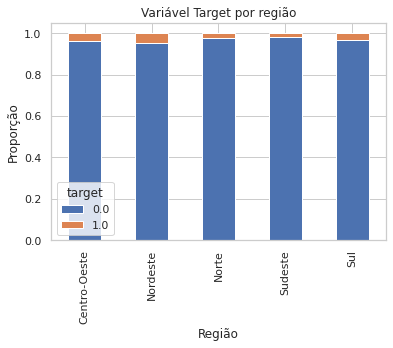

In [1028]:
#Análise bivariada - Região
table=pd.crosstab(Base.UF_AQUISICAO,Base.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Variável Target por região')
plt.xlabel('Região')
plt.ylabel('Proporção')

Text(0, 0.5, 'Proporção')

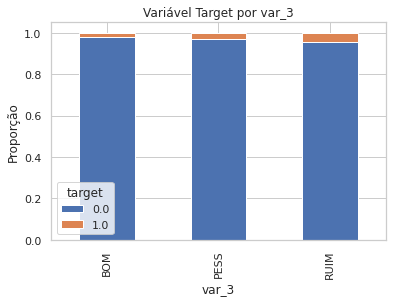

In [1029]:
#Análise bivariada - var_3
table=pd.crosstab(Base.var_3,Base.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Variável Target por var_3')
plt.xlabel('var_3')
plt.ylabel('Proporção')

Text(0, 0.5, 'Proporção')

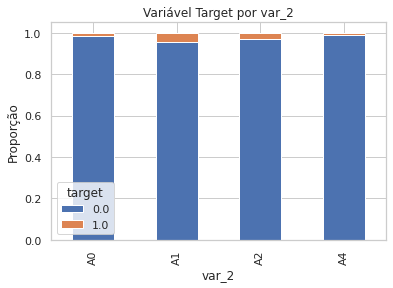

In [1030]:
#Análise bivariada - var_2
table=pd.crosstab(Base.var_2,Base.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Variável Target por var_2')
plt.xlabel('var_2')
plt.ylabel('Proporção')

Text(0, 0.5, 'Proporção')

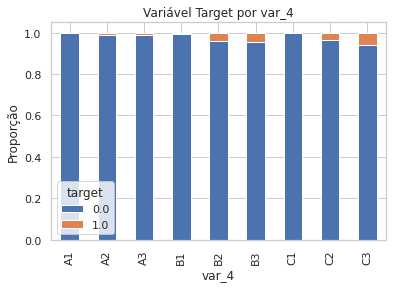

In [1031]:
#Análise bivariada - var_4
table=pd.crosstab(Base.var_4,Base.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Variável Target por var_4')
plt.xlabel('var_4')
plt.ylabel('Proporção')

Text(-15.665000000000006, 0.5, 'Valor principal')

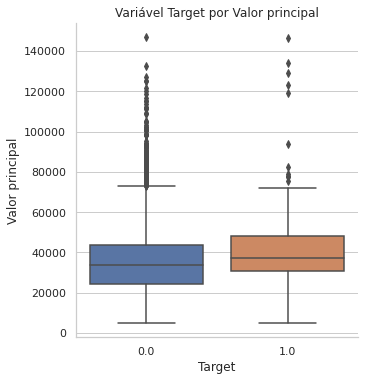

In [1032]:
#Análise bivariada - valor principal
sns.catplot(x="target",y="VLR_PRINCIPAL", kind="box", data=Base)
plt.title('Variável Target por Valor principal')
plt.xlabel('Target')
plt.ylabel('Valor principal')

Text(12.334999999999994, 0.5, 'idade')

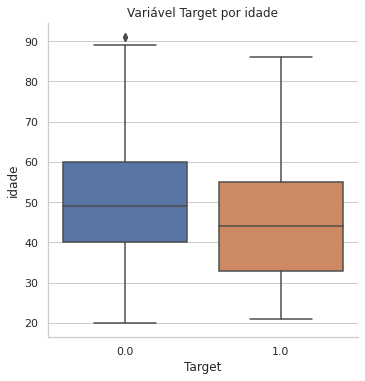

In [1033]:
#Análise bivariada - idade
sns.catplot(x="target",y="idade", kind="box", data=Base)
plt.title('Variável Target por idade')
plt.xlabel('Target')
plt.ylabel('idade')

Text(5.334999999999994, 0.5, 'score_sis')

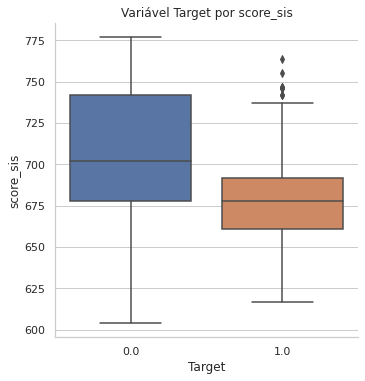

In [1034]:
#Análise bivariada - score_sis
sns.catplot(x="target",y="score_sis", kind="box", data=Base)
plt.title('Variável Target por score_sis')
plt.xlabel('Target')
plt.ylabel('score_sis')

Text(-1.6650000000000063, 0.5, 'CEP')

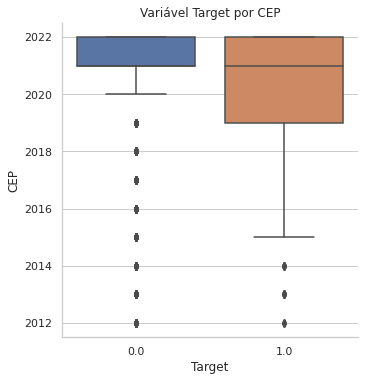

In [1035]:
#Análise bivariada - CEP
sns.catplot(x="target",y="ANO_MODELO_VEIC", kind="box", data=Base)
plt.title('Variável Target por CEP')
plt.xlabel('Target')
plt.ylabel('CEP')

In [1036]:
#Análise univariada das variável quantitativas
Base.drop(['target'], axis=1).describe()

,idade,CEP,carencia,PERCENTUAL_ENTRADA_VEICU,ANO_MODELO_VEIC,QTDE_PRESTACOES,VLR_PRINCIPAL,TAXA_MENSAL,VLR_RENDA,VLR_MAX_RENDA_PRESUM,PC_COMPR_RENDA_FAMILIAR,score_sis,var_1,VLR_RENDA2
count,9489.00000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,7354.000000,9489.000000
mean,49.63484,51.862683,30.287702,38.512629,2020.438929,44.739804,35573.963058,1.059175,6111.181599,3028.542839,18.321319,705.226578,2.459478,6111.181599
std,13.74140,29.407869,3.261291,22.043339,2.345946,13.402105,15811.966529,0.454553,10304.293807,2861.116300,12.542059,36.893583,0.812859,10304.293807
min,20.00000,1.000000,30.000000,0.000000,2012.000000,12.000000,4906.770000,0.000000,0.820000,0.000000,0.000000,604.000000,1.000000,0.820000
25%,39.00000,24.000000,30.000000,23.530000,2021.000000,36.000000,24469.670000,0.910000,3690.000000,1353.000000,10.000000,678.000000,2.000000,3690.000000
50%,49.00000,58.000000,30.000000,37.190000,2021.000000,48.000000,33698.830000,1.120000,4838.000000,1927.000000,19.000000,702.000000,3.000000,4838.000000
75%,60.00000,78.000000,30.000000,54.910000,2022.000000,60.000000,43946.280000,1.310000,6560.000000,3321.000000,26.000000,742.000000,3.000000,6560.000000
max,91.00000,99.000000,90.000000,95.190000,2022.000000,60.000000,146923.550000,2.560000,697000.000000,37679.000000,99.000000,777.000000,3.000000,697000.000000


In [1037]:
# Imputação dos dados faltantes: substitui Na das covariáveis numéricas numérica pela mediana
Base=Base.fillna(Base.median())
# Deleta a variável CEP : Não sabemos se é quali ou quanti
Base=Base.drop('CEP', 1)

In [1038]:
# Separa as bases em variáveis resposta e explicativas
X = Base.drop('target', axis = 1)
y = Base['target']

In [1039]:
# Separa as variáveis explicativas em numéricas e categóricas
X_cat = X.select_dtypes(include = 'object').copy()
X_num = X.select_dtypes(include = 'number').copy()

In [1040]:
# Teste Qui-quadrado para as variáveis qualitativas
chi2_check = {}
for column in X_cat:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(y, X_cat[column]))
    chi2_check.setdefault('Feature',[]).append(column)
    chi2_check.setdefault('p-value',[]).append(round(p, 10))

chi2_result = pd.DataFrame(data = chi2_check)
chi2_result.sort_values(by = ['p-value'], ascending = True, ignore_index = True, inplace = True)
chi2_result

,Feature,p-value
0,var_4,0.000000e+00
1,UF_AQUISICAO,1.700000e-09
2,var_2,6.516000e-07
3,var_3,2.671500e-06
4,Idade_Bem,5.388427e-02
5,var_5,1.552249e-01
6,Autonomos,5.508251e-01


In [1041]:
# Teste F para as variáveis quantitativas

F_statistic, p_values = f_classif(X_num, y)
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': X_num.columns.values,
'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})
ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)
ANOVA_F_table


,Numerical_Feature,F-Score,p values
0,TAXA_MENSAL,186.512538,0.000000e+00
1,score_sis,155.407130,0.000000e+00
2,PERCENTUAL_ENTRADA_VEICU,124.708623,0.000000e+00
3,QTDE_PRESTACOES,79.253591,0.000000e+00
4,var_1,58.257535,0.000000e+00
5,PC_COMPR_RENDA_FAMILIAR,39.420394,4.000000e-10
6,VLR_MAX_RENDA_PRESUM,37.655986,9.000000e-10
7,idade,36.986642,1.200000e-09
8,VLR_PRINCIPAL,26.294327,2.989000e-07
9,ANO_MODELO_VEIC,5.933653,1.487270e-02


<AxesSubplot:>

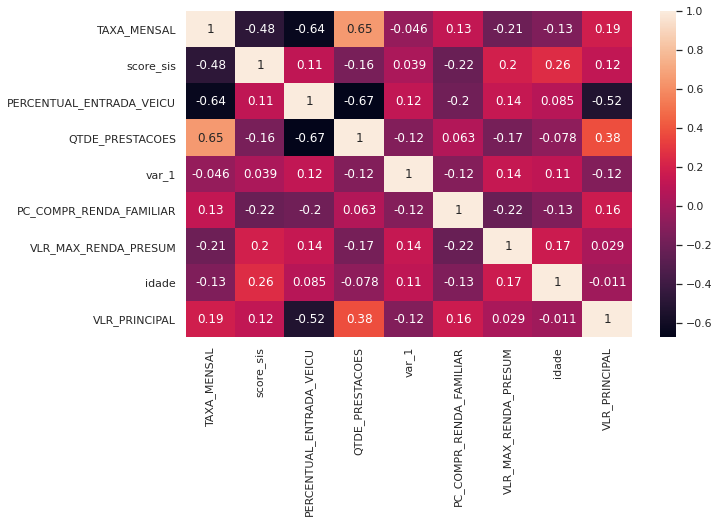

In [1042]:
# Verifica a correlação das variáveis quantitativas significativas no teste F
top_num_features = ANOVA_F_table.iloc[:9,0].to_list()
corrmat = X_num[top_num_features].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corrmat,annot=True)

In [1043]:
# Cria lista com as variáveis a serem excluídas
drop_columns_list = ANOVA_F_table.iloc[9:, 0].to_list()
drop_columns_list.extend(chi2_result.iloc[4:, 0].to_list())
# Excluídas dedivo a alta correlação
drop_columns_list.extend(['PERCENTUAL_ENTRADA_VEICU','QTDE_PRESTACOES'])
drop_columns_list

['ANO_MODELO_VEIC',
 'carencia',
 'VLR_RENDA',
 'VLR_RENDA2',
 'Idade_Bem',
 'var_5',
 'Autonomos',
 'PERCENTUAL_ENTRADA_VEICU',
 'QTDE_PRESTACOES']

In [1044]:
# Retira as variáveis descartadas
def col_to_drop(df, columns_list):
    df.drop(columns = columns_list, inplace = True)

col_to_drop(X, drop_columns_list)

<AxesSubplot:>

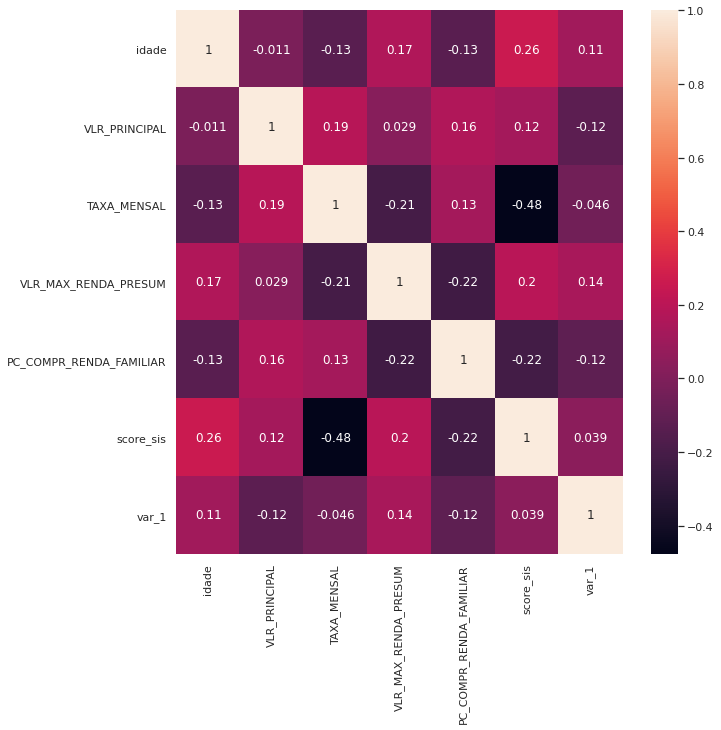

In [1045]:
# Verifica a nova matriz de correlação
corrmat = X.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat,annot=True)

In [1046]:
# Dados faltantes: Nas variáveis qualitativas substitui pela moda da variável
def impute_nan_most_frequent_category(DataFrame,ColName):
     most_frequent_category=DataFrame[ColName].mode()[0]
     DataFrame[ColName + "_Imputed"] = DataFrame[ColName]
     DataFrame[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)
for Columns in ['var_2','var_3','var_4','VLR_RENDA_CAT']:
    impute_nan_most_frequent_category(X,Columns)
    
# Retira as colunas anteriores
X = X.drop(['var_2','var_3','var_4','VLR_RENDA_CAT'], axis = 1)

In [1047]:
# Transforma as variáveis categóricas em dummies 
cat_vars=['UF_AQUISICAO','var_2_Imputed','var_3_Imputed','var_4_Imputed','VLR_RENDA_CAT_Imputed','IDADE_CAT']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(X[var], prefix=var)
    data1=X.join(cat_list)
    X=data1
cat_vars=['UF_AQUISICAO','var_2_Imputed','var_3_Imputed','var_4_Imputed','VLR_RENDA_CAT_Imputed','IDADE_CAT']
data_vars=X.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
X=X[to_keep]
data_final=pd.concat([X, y],axis=1)
# Mostra todas as covariáveis
X.columns.values

array(['idade', 'VLR_PRINCIPAL', 'TAXA_MENSAL', 'VLR_MAX_RENDA_PRESUM',
       'PC_COMPR_RENDA_FAMILIAR', 'score_sis', 'var_1',
       'UF_AQUISICAO_Centro-Oeste', 'UF_AQUISICAO_Nordeste',
       'UF_AQUISICAO_Norte', 'UF_AQUISICAO_Sudeste', 'UF_AQUISICAO_Sul',
       'var_2_Imputed_A0', 'var_2_Imputed_A1', 'var_2_Imputed_A2',
       'var_2_Imputed_A4', 'var_3_Imputed_BOM', 'var_3_Imputed_PESS',
       'var_3_Imputed_RUIM', 'var_4_Imputed_A1', 'var_4_Imputed_A2',
       'var_4_Imputed_A3', 'var_4_Imputed_B1', 'var_4_Imputed_B2',
       'var_4_Imputed_B3', 'var_4_Imputed_C1', 'var_4_Imputed_C2',
       'var_4_Imputed_C3', 'VLR_RENDA_CAT_Imputed_<3690',
       'VLR_RENDA_CAT_Imputed_3690-4838',
       'VLR_RENDA_CAT_Imputed_4838-6560', 'VLR_RENDA_CAT_Imputed_>6560',
       'IDADE_CAT_<39', 'IDADE_CAT_39-49', 'IDADE_CAT_49-60',
       'IDADE_CAT_>60'], dtype=object)

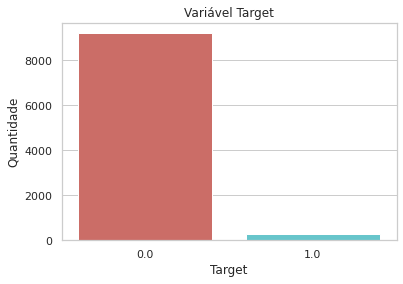

In [1048]:
# Verifica desbalanceamento da resposta
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='target',data=Base, palette='hls')
plt.title('Variável Target')
plt.xlabel('Target')
plt.ylabel('Quantidade')
plt.show()

In [1049]:
# Separa a base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [1050]:
# Técnica SMOTE (devido ao desbalanceamento dos dados)
os = SMOTE(random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['target'])
# Mostra os resultados
print("O tamanho da nova amostra é",len(os_data_X))
print("Tamanho da resposta para target=0",len(os_data_y[os_data_y['target']==0]))
print("Tamanho da resposta para target=1",len(os_data_y[os_data_y['target']==1]))
print("Proporção para target=0",len(os_data_y[os_data_y['target']==0])/len(os_data_X))
print("Proporção para target=1",len(os_data_y[os_data_y['target']==1])/len(os_data_X))

O tamanho da nova amostra é 14734
Tamanho da resposta para target=0 7367
Tamanho da resposta para target=1 7367
Proporção para target=0 0.5
Proporção para target=1 0.5


In [1051]:
# Esta variável foi acrescentada para possível aprimoramento do modelo! 
os_data_X['idade_var_1']=os_data_X['idade']*os_data_X['var_1']
X_test['idade_var_1']=X_test['idade']*X_test['var_1']

<ipython-input-1051-07fbd3ab4324>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['idade_var_1']=X_test['idade']*X_test['var_1']


In [1052]:
# Padroniza as varíaveis contínuas
X_train_stand = os_data_X.copy()
X_test_stand = X_test.copy()

# Variáveis numéricas
num_cols = ['idade',  'VLR_PRINCIPAL', 'VLR_MAX_RENDA_PRESUM', 
          'PC_COMPR_RENDA_FAMILIAR', 'score_sis', 'TAXA_MENSAL','var_1','idade_var_1']

# Aplica a padronização
for i in num_cols:
    
    scale = StandardScaler().fit(X_train_stand[[i]])
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [1053]:
# Covariáveis consideradas no modelo
cols=['idade', 
      'VLR_PRINCIPAL', 
      'VLR_MAX_RENDA_PRESUM', 
      'PC_COMPR_RENDA_FAMILIAR', 
      'score_sis',
      'TAXA_MENSAL',
      'var_1',
      'UF_AQUISICAO_Centro-Oeste', 'UF_AQUISICAO_Nordeste',
      'UF_AQUISICAO_Norte', 'UF_AQUISICAO_Sudeste', 'UF_AQUISICAO_Sul',
      'var_2_Imputed_A0', 
      'var_2_Imputed_A1', 
      'var_2_Imputed_A2', 
      'var_2_Imputed_A4',
      'var_3_Imputed_BOM', 
      'var_3_Imputed_PESS',
      'var_3_Imputed_RUIM',
      #'var_4_Imputed_A1', 'var_4_Imputed_A2',
      #'var_4_Imputed_A3', 'var_4_Imputed_B1', 'var_4_Imputed_B2',
      #'var_4_Imputed_B3', 'var_4_Imputed_C1', 'var_4_Imputed_C2',
      #'var_4_Imputed_C3'
     ]

X=X_train_stand[cols]
y=os_data_y['target']
X_test=X_test_stand[cols]
X_train=X
y_train=y
# Resultado para um ajuste de modelo de regressão: Avalia p-valor
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.372043
         Iterations 8
                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.463     
Dependent Variable:    target              AIC:                 11001.3673
Date:                  2021-08-17 09:38    BIC:                 11145.7276
No. Observations:      14734               Log-Likelihood:      -5481.7   
Df Model:              18                  LL-Null:             -10213.   
Df Residuals:          14715               LLR p-value:         0.0000    
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        8.0000                                             
--------------------------------------------------------------------------
                           Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
idade                     -0

In [1054]:
# Covariáveis consideradas no modelo após a retirada pela RL
cols=['idade', 
      'VLR_PRINCIPAL', 
      #'VLR_MAX_RENDA_PRESUM', 
      'PC_COMPR_RENDA_FAMILIAR', 
      'score_sis',
      'TAXA_MENSAL',
      'var_1',
      'UF_AQUISICAO_Centro-Oeste', 'UF_AQUISICAO_Nordeste',
      'UF_AQUISICAO_Norte', 'UF_AQUISICAO_Sudeste', 'UF_AQUISICAO_Sul',
      #'var_2_Imputed_A0', 
      #'var_2_Imputed_A1', 
      #'var_2_Imputed_A2', 
      #'var_2_Imputed_A4',
      #'var_3_Imputed_BOM', 
      #'var_3_Imputed_PESS',
      #'var_3_Imputed_RUIM',
      #'var_4_Imputed_A1', 'var_4_Imputed_A2',
      #'var_4_Imputed_A3', 'var_4_Imputed_B1', 'var_4_Imputed_B2',
      #'var_4_Imputed_B3', 'var_4_Imputed_C1', 'var_4_Imputed_C2',
      #'var_4_Imputed_C3'
     ]

X=X_train_stand[cols]
y=os_data_y['target']
X_test=X_test_stand[cols]
X_train=X
y_train=y
# Resultado para um ajuste de modelo de regressão
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.399598
         Iterations 7
                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.424     
Dependent Variable:    target              AIC:                 11797.3585
Date:                  2021-08-17 09:38    BIC:                 11880.9355
No. Observations:      14734               Log-Likelihood:      -5887.7   
Df Model:              10                  LL-Null:             -10213.   
Df Residuals:          14723               LLR p-value:         0.0000    
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        7.0000                                             
--------------------------------------------------------------------------
                           Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
idade                     -0

In [1055]:
#--------------------------------------------------------------------------------------------------------
# --------------RODAR CADA MODELO POR VEZ: PULAR OS DEMAIS QUANDO RODAR ESTE-----------------------------
# Modelo Regressão Logística
model = LogisticRegression(C=1,solver='liblinear', random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.coef_, model.intercept_)
# --------------RODAR CADA MODELO POR VEZ: PULAR OS DEMAIS QUANDO RODAR ESTE-----------------------------
#--------------------------------------------------------------------------------------------------------

[[-0.18510963  0.21964057  0.15352174 -0.59184925  1.02576496 -0.5705685
  -6.83488394 -5.46569978 -7.11909676 -6.63364764 -6.25532934]] [4.77615659]


In [1056]:
#--------------------------------------------------------------------------------------------------------
# --------------RODAR CADA MODELO POR VEZ: PULAR OS DEMAIS QUANDO RODAR ESTE-----------------------------
# Modelo K Neighbors
model = KNeighborsClassifier(100)
model.fit(X_train, y_train)
model.score(X_test, y_test)
y_pred = model.predict(X_test)
# --------------RODAR CADA MODELO POR VEZ: PULAR OS DEMAIS QUANDO RODAR ESTE-----------------------------
#--------------------------------------------------------------------------------------------------------

In [1057]:
#--------------------------------------------------------------------------------------------------------
# --------------RODAR CADA MODELO POR VEZ: PULAR OS DEMAIS QUANDO RODAR ESTE-----------------------------
# Modelo Decision Tree
model = DecisionTreeClassifier(max_depth=7)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
# --------------RODAR CADA MODELO POR VEZ: PULAR OS DEMAIS QUANDO RODAR ESTE-----------------------------
#--------------------------------------------------------------------------------------------------------

In [965]:
#--------------------------------------------------------------------------------------------------------
# --------------RODAR CADA MODELO POR VEZ: PULAR OS DEMAIS QUANDO RODAR ESTE-----------------------------
model = xgb.XGBClassifier(learning_rate=0.02,booster='gblinear',eta=0.8,max_depth=15)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(model.coef_, model.intercept_)
# --------------RODAR CADA MODELO POR VEZ: PULAR OS DEMAIS QUANDO RODAR ESTE-----------------------------
#--------------------------------------------------------------------------------------------------------

/home/suellen/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:27:57] WARNING: ../src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:27:57] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[-0.174138  0.235395  0.159872 -0.604767  0.776785 -0.364399 -1.75057
 -0.686407 -1.98348  -1.63078  -1.29814 ] [0.432879]


In [2230]:
#--------------------------------------------------------------------------------------------------------
# --------------RODAR CADA MODELO POR VEZ: PULAR OS DEMAIS QUANDO RODAR ESTE-----------------------------
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
# --------------RODAR CADA MODELO POR VEZ: PULAR OS DEMAIS QUANDO RODAR ESTE-----------------------------
#--------------------------------------------------------------------------------------------------------

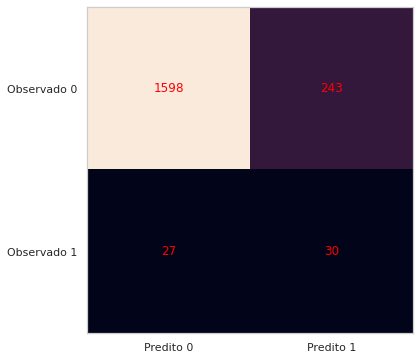

[[1598  243]
 [  27   30]]


In [966]:
# Matriz de confusão
confusion_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(confusion_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predito 0', 'Predito 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Observado 0', 'Observado 1'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='red')
plt.show()
print(confusion_matrix)

In [967]:
# Acuŕacia, precisão e recall
print("Accuracia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracia: 0.8577449947312961
Precisão: 0.10989010989010989
Recall: 0.5263157894736842


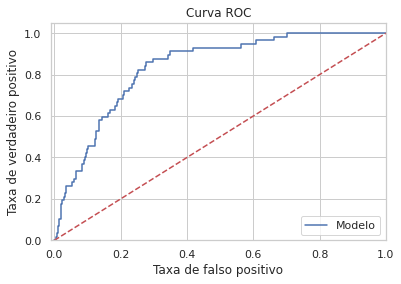

0.6971611538351582

In [968]:
# Curva ROC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Modelo' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de falso positivo')
plt.ylabel('Taxa de verdadeiro positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
logit_roc_auc

In [969]:
y_hat_test_proba = model.predict_proba(X_test)
y_hat_test_proba = y_hat_test_proba[:][: , 1]
y_test_temp = y_test.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba), pd.DataFrame(y_pred)], axis = 1)
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba', 'y_hat_test']
y_test_proba.index = X_test.index
y_test_proba.head()

,y_test_class_actual,y_hat_test_proba,y_hat_test
9635,0.0,0.004532,0.0
5762,0.0,0.002462,0.0
7436,0.0,0.330485,0.0
6659,0.0,0.012713,0.0
3391,0.0,0.048702,0.0


In [970]:
#Area abaixo ROC
AUROC = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
AUROC

0.8336811610775988

In [971]:
#Gini
Gini = AUROC * 2 - 1
Gini

0.6673623221551976

In [972]:
# Calculo do KS
actual_predicted_probs_df = y_test_proba.sort_values('y_hat_test_proba')
actual_predicted_probs_df = actual_predicted_probs_df.reset_index()
actual_predicted_probs_df['cum_n_pop'] = actual_predicted_probs_df.index +1
actual_predicted_probs_df['cum_good'] = actual_predicted_probs_df['y_test_class_actual'].cumsum()
actual_predicted_probs_df['cum_bad'] = actual_predicted_probs_df['cum_n_pop'] - actual_predicted_probs_df['y_test_class_actual'].cumsum()
actual_predicted_probs_df['cum_n_%'] = actual_predicted_probs_df['cum_n_pop']/(actual_predicted_probs_df.shape[0])
actual_predicted_probs_df['cum_good_%'] = actual_predicted_probs_df['cum_good']/actual_predicted_probs_df['y_test_class_actual'].sum()
actual_predicted_probs_df['cum_bad_%'] = actual_predicted_probs_df['cum_bad']/ (actual_predicted_probs_df.shape[0]-actual_predicted_probs_df['y_test_class_actual'].sum())

Text(0.5, 1.0, 'Gráfico KS')

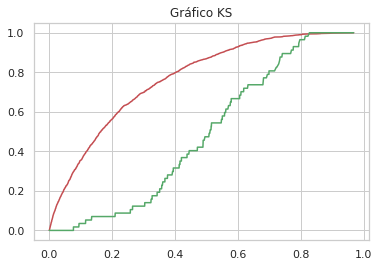

In [973]:
# Gráfico KS
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_bad_%'], c='r')
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_good_%'], c='g')
plt.title('Gráfico KS')

In [974]:
# Valor KS
ks = max(actual_predicted_probs_df['cum_bad_%'] - actual_predicted_probs_df['cum_good_%'])
print('The KS score is ',ks)

The KS score is  0.5831689489884407


In [1058]:
#--------------------------------------------------------------------------------------------------
# -----------------Aprimoramento do modelo XGBoost-------------------------------------------------
#--------------------------------------------------------------------------------------------------
cols=['idade', 
      'VLR_PRINCIPAL', 
      #'VLR_MAX_RENDA_PRESUM', 
      'PC_COMPR_RENDA_FAMILIAR', 
      'score_sis',
      'TAXA_MENSAL',
      'var_1',
      'UF_AQUISICAO_Centro-Oeste', 'UF_AQUISICAO_Nordeste',
      'UF_AQUISICAO_Norte', 'UF_AQUISICAO_Sudeste', 'UF_AQUISICAO_Sul',
      'idade_var_1'
      #'var_2_Imputed_A0', 
      #'var_2_Imputed_A1', 
      #'var_2_Imputed_A2', 
      #'var_2_Imputed_A4',
      #'var_3_Imputed_BOM', 
      #'var_3_Imputed_PESS',
      #'var_3_Imputed_RUIM',
      #'var_4_Imputed_A1', 'var_4_Imputed_A2',
      #'var_4_Imputed_A3', 'var_4_Imputed_B1', 'var_4_Imputed_B2',
      #'var_4_Imputed_B3', 'var_4_Imputed_C1', 'var_4_Imputed_C2',
      #'var_4_Imputed_C3'
     ]
X_train=X_train_stand[cols]

X_test=X_test_stand[cols]

In [1059]:
# Modelo XGBoost
model = xgb.XGBClassifier(learning_rate=0.02,booster='gblinear',eta=0.8,max_depth=15)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(model.coef_, model.intercept_)

[09:39:09] WARNING: ../src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:39:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[-0.0803759  0.232329   0.148944  -0.607993   0.781531  -0.257227
 -1.76151   -0.701777  -1.99907   -1.63225   -1.31087   -0.200286 ] [0.433044]


/home/suellen/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


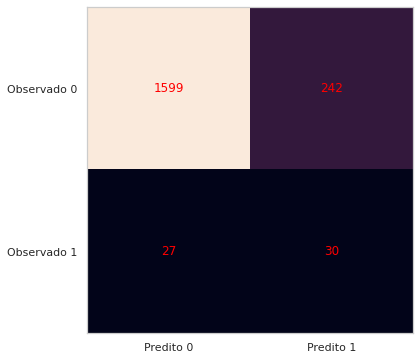

[[1599  242]
 [  27   30]]


In [1060]:
# Matriz de confusão
confusion_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(confusion_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predito 0', 'Predito 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Observado 0', 'Observado 1'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='red')
plt.show()
print(confusion_matrix)

In [979]:
# Acuŕacia, precisão e recall
print("Accuracia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracia: 0.8582718651211801
Precisão: 0.11029411764705882
Recall: 0.5263157894736842


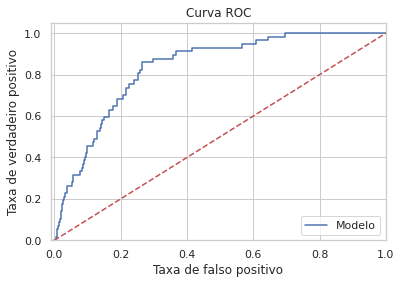

0.6974327453615027

In [980]:
# Curva ROC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Modelo' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de falso positivo')
plt.ylabel('Taxa de verdadeiro positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
logit_roc_auc

Text(0.5, 1.0, 'Gráfico KS')

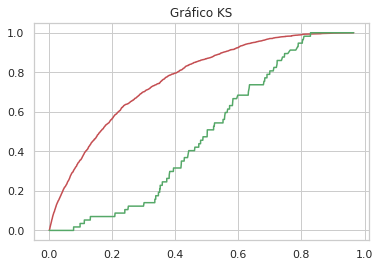

In [981]:
# Calculo do KS
y_hat_test_proba = model.predict_proba(X_test)
y_hat_test_proba = y_hat_test_proba[:][: , 1]
y_test_temp = y_test.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba), pd.DataFrame(y_pred)], axis = 1)
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba', 'y_hat_test']
y_test_proba.index = X_test.index
actual_predicted_probs_df = y_test_proba.sort_values('y_hat_test_proba')
actual_predicted_probs_df = actual_predicted_probs_df.reset_index()
actual_predicted_probs_df['cum_n_pop'] = actual_predicted_probs_df.index +1
actual_predicted_probs_df['cum_good'] = actual_predicted_probs_df['y_test_class_actual'].cumsum()
actual_predicted_probs_df['cum_bad'] = actual_predicted_probs_df['cum_n_pop'] - actual_predicted_probs_df['y_test_class_actual'].cumsum()
actual_predicted_probs_df['cum_n_%'] = actual_predicted_probs_df['cum_n_pop']/(actual_predicted_probs_df.shape[0])
actual_predicted_probs_df['cum_good_%'] = actual_predicted_probs_df['cum_good']/actual_predicted_probs_df['y_test_class_actual'].sum()
actual_predicted_probs_df['cum_bad_%'] = actual_predicted_probs_df['cum_bad']/ (actual_predicted_probs_df.shape[0]-actual_predicted_probs_df['y_test_class_actual'].sum())
# Gráfico KS
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_bad_%'], c='r')
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_good_%'], c='g')
plt.title('Gráfico KS')

In [982]:
# Valor KS
ks = max(actual_predicted_probs_df['cum_bad_%'] - actual_predicted_probs_df['cum_good_%'])
print('The KS score is ',ks)

The KS score is  0.5945757930949046
